In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('sms_spam.csv', sep=',')
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5574, 2)

# EDA

In [4]:
df.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4827   4518                             Sorry, I'll call later   30
spam   747    642  Please call our customer service representativ...    4

In [5]:
df['length']=df['text'].apply(len)
df

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,160
5570,ham,Will ü b going to esplanade fr home?,36
5571,ham,"Pity, * was in mood for that. So...any other s...",57
5572,ham,The guy did some bitching but I acted like i'd...,125


# Viz

<AxesSubplot:ylabel='Frequency'>

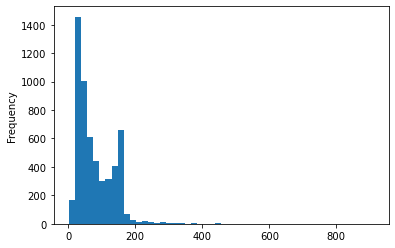

In [6]:
df['length'].plot(bins=50, kind='hist')

In [7]:
df['length'].describe()

count    5574.000000
mean       80.444923
std        59.841828
min         2.000000
25%        36.000000
50%        61.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [8]:
df[df['length']==910]['text']

1085    For me the love should start with attraction.i...
Name: text, dtype: object

In [9]:
# introducing how to remove punctuation
import string
mess='sample message!........'
nonpuc=[char for char in mess if char not in string.punctuation]
nonpuc="".join(nonpuc)
print(nonpuc)

sample message


In [10]:
# Checking what are English top 20 stopwords
from nltk.corpus import stopwords

stopwords.words('english')[1:20]

['me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

Move on with the SMS data

In [11]:
N=5574
Corpus=[]
import re
from nltk.stem.porter import PorterStemmer

In [12]:
ps=PorterStemmer()

In [13]:
for i in range (0,N):
    sms=re.sub('[^a-zA-Z]', " ", df['text'][i])
    sms=sms.lower()
    sms=sms.split()
    sms=[ps.stem(word) for word in sms if not word in set (stopwords.words('english'))]
    sms=" ".join(sms)
    Corpus.append(sms)

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordstring=" ".join(Corpus)
wordcloud=WordCloud(stopwords=STOPWORDS, background_color='white', max_words=100).generate(wordstring)



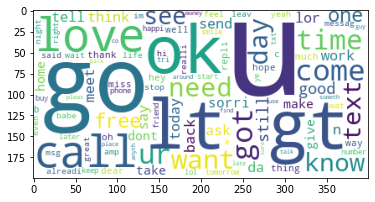

In [15]:
plt.clf()
plt.imshow(wordcloud)
plt.show();

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
vectorizer=TfidfVectorizer(use_idf=True, strip_accents='ascii')

In [18]:
df.type.replace('spam',1,inplace=True)
df.type.replace('ham',0,inplace=True)

In [21]:
Corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [20]:
X= vectorizer.fit_transform(Corpus)
y=df['type']

In [22]:

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:
from sklearn.naive_bayes import MultinomialNB

spam_detect_model=MultinomialNB().fit(X_train,y_train)

Prediction

In [25]:
prediction=spam_detect_model.predict(X_test)

In [28]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cr=classification_report(y_test,prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1203
           1       0.99      0.79      0.88       191

    accuracy                           0.97      1394
   macro avg       0.98      0.89      0.93      1394
weighted avg       0.97      0.97      0.97      1394

